In [23]:
import numpy as np
import matplotlib.pyplot as plt


class RandomCustomers:
    def __init__(self, m):
        self.num_customers = m
        self.locations = [(round(np.random.uniform(-1, 1), 5), round(np.random.uniform(-1, 1), 5)) for i in range(m)]
        self.demands = [round(np.random.uniform(0.1, 0.2), 3) for i in range(m)]

    def plot_customers(self):
        plt.figure(figsize=(8, 8))
        ax = plt.gca()
        plt.xlim((-1.3, 1.3))
        plt.ylim((-1.3, 1.3))
        for loc, dem in zip(self.locations, self.demands):
            circle = plt.Circle(loc, dem, color='blue', fill=False, lw=2)
            ax.add_artist(circle)
        plt.show()


class RandomDepots:
    def __init__(self, n):
        self.num_depots = n
        self.locations = [(round(np.random.uniform(-1, 1), 5), round(np.random.uniform(-1, 1), 5)) for i in range(n)]
        self.capacities = [round(np.random.uniform(0.2, 0.3), 3) for i in range(n)]

    def plot_depots(self):
        plt.figure(figsize=(8, 8))
        ax = plt.gca()
        plt.xlim((-1.3, 1.3))
        plt.ylim((-1.3, 1.3))
        for loc, cap in zip(self.locations, self.capacities):
            circle = plt.Circle(loc, cap, color='red', fill=False, lw=2)
            ax.add_artist(circle)
        plt.show()


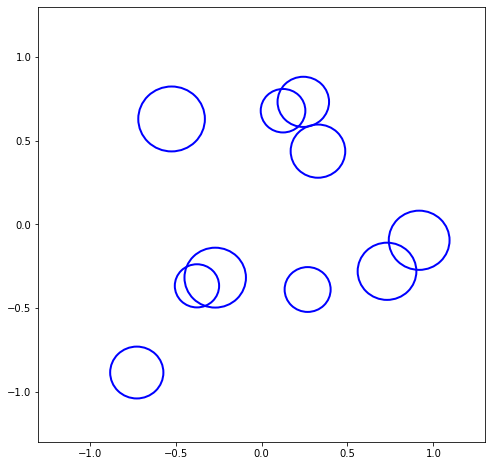

In [24]:
c = RandomCustomers(10)
c.plot_customers()

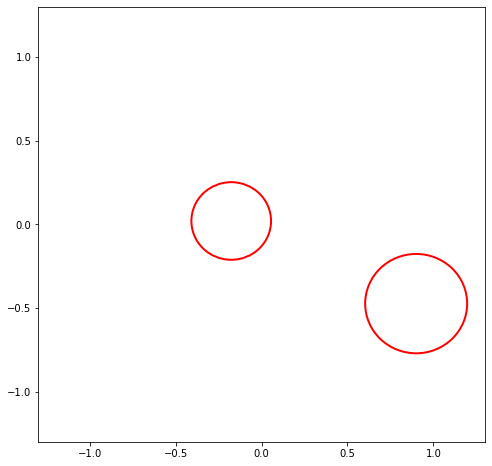

In [25]:
d = RandomDepots(2)
d.plot_depots()

In [ ]:
def calc_costs()

In [28]:
np.zeros((1,1))

array([[0.]])

In [ ]:
def mclp(customers, depots):
    c = calc_costs(customers.locations, depots.locations)
    J = sites.shape[0]
    I = points.shape[0]
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0
    # Build model
    m = Model()
    # Add variables
    x = {}
    y = {}
    for i in range(I):
      y[i] = m.addVar(vtype=GRB.BINARY, name="y%d" % i)
    for j in range(J):
      x[j] = m.addVar(vtype=GRB.BINARY, name="x%d" % j)

    m.update()
    # Add constraints
    m.addConstr(quicksum(x[j] for j in range(J)) == K)

    for i in range(I):
        m.addConstr(quicksum(x[j] for j in np.where(D[i]==1)[0]) >= y[i])

    m.setObjective(quicksum(y[i]for i in range(I)),GRB.MAXIMIZE)
    m.setParam('OutputFlag', 0)
    m.optimize()
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objVal)
    
    solution = []
    if m.status == GRB.Status.OPTIMAL:
        for v in m.getVars():
            # print v.varName,v.x
            if v.x==1 and v.varName[0]=="x":
               solution.append(int(v.varName[1:]))
    opt_sites = sites[solution]
    return opt_sites,m.objVal

In [29]:
[2] * 3

[2, 2, 2]

In [46]:
growth = 0.05

start = 1
history = [start]
for i in range(3):
    history.append(round(history[-1] * (1 + growth), 5))
history

[1, 1.05, 1.1025, 1.15763]

In [48]:
end = 1.15763
growth = 0.05
history = [end]
for i in range(3, 0, -1):
    history.append(round(history[-1] / (1 + growth), 5))
history

[1.15763, 1.1025, 1.05, 1.0]